## SMOTE (Synthetic Minority Oversampling Technique)

**SMOTE (Synthetic Minority Over-sampling Technique)** is a method for handling imbalanced datasets by creating new,synthetic samples 
for the minority class instead of simply duplicating existing ones.

In SMOTE, the algorithm looks at existing samples in the minority class and generates new samples by selecting two similar samples and 
creating a point between them. This helps the model learn patterns in the minority class more effectively, reducing bias and improving 
prediction performance.

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,
                         n_clusters_per_class=1,weights=[0.90],random_state=12)

In [5]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

In [7]:
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [8]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

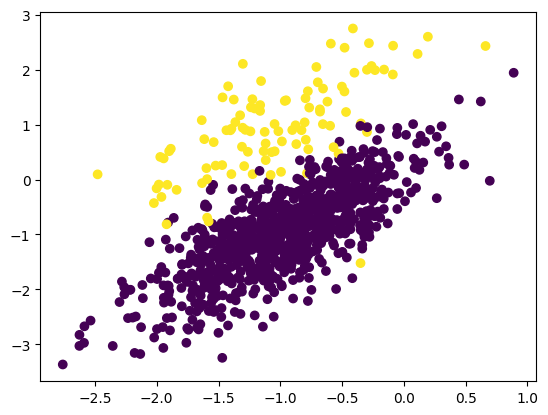

In [10]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [11]:
# applying SMOTE

In [12]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
# transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [18]:
X.shape

(1800, 2)

In [19]:
y.shape

(1800,)

In [22]:
len(y[y==0])

900

In [23]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

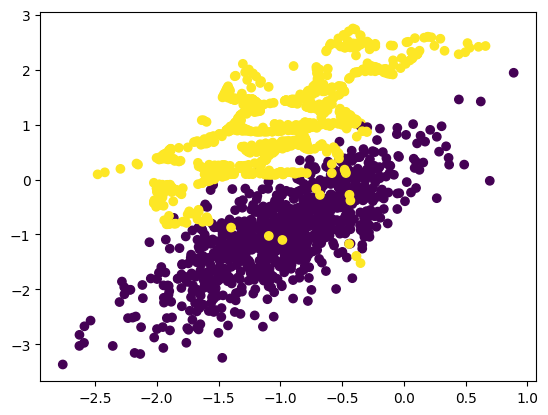

In [25]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])